# Zbiór danych - wyniki wyborów do Parlamentu Europejskiego 2019 w Polsce

2019-european-parliament-election-in-poland-data

Źródło: Kaggle, https://www.kaggle.com/datasets/brezniczky/2019-european-parliament-election-in-poland-data

Zbiór składa się z 13 arkuszy - po jednym dla każdego okręgu wyborczego. W każdym arkuszu znajdują się informacje o liczbie głosów oddanych na poszczególnych kandydatów w poszczególnych obwodach, wraz z charakterystyką obwodu (wieś/miasto, przynależność do powiatu i gminy, dokładna lokalizacja, informacja o frekwencji i głosach nieważnych). W ramach preprocesingu, połączyliśmy wszystkie arkusze w pojedynczą strukturę danych, sumując głosy na kandydatów danego komitetu wyborczego w poszczególnym obwodzie do zbiorczego dla tego obwodu wyniku komitetu.

# Prezentacja danych przed preprocessingiem

In [1]:
#Testowe wczytanie pojedynczego arkusza z danymi (1 z 13)
import pandas as pd
data_district_1=pd.read_csv('2019-european-parliament-election-in-poland-data\wyniki_gl_na_kand_po_obwodach_sheet_1.csv')
data_district_1

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,2 KNUTH Maciej,3 JANOWICZ Kamila Marta,4 WIŚNIEWSKI Radosław Andrzej,5 PAWEŁCZAK Barnaba Bogusz,6 STRUK Anna Marta,7 WARDA Małgorzata Maja,8 MAKRENEK Helena Cecylia,9 DOMŻALSKA Elżbieta Maria,10 GRAJKOWSKI Piotr,Razem.6
0,220101,1,wieś,stały,Gminna Biblioteka i Ośrodek Kultury w Borzytuc...,gm. Borzytuchom,bytowski,pomorskie,1199,1583,...,0,1,0,0,0,0,0,0,0,4
1,220101,2,wieś,stały,"Sala wiejska, Dąbrówka 22, 77-100 Bytów",gm. Borzytuchom,bytowski,pomorskie,349,463,...,2,0,0,0,0,0,0,0,0,2
2,220101,3,wieś,stały,"Szkoła Podstawowa, Niedarzyno 21b, 77-141 Borz...",gm. Borzytuchom,bytowski,pomorskie,319,424,...,0,0,0,0,0,0,0,0,0,2
3,220102,1,miasto,stały,"Zespół Szkół Ogólnokształcących, ul. Gdańska 5...",gm. Bytów,bytowski,pomorskie,1180,1550,...,0,0,0,0,0,0,0,0,1,1
4,220102,2,miasto,stały,"Zespół Szkół Ponadgimnazjalnych, ul. Gen. Wład...",gm. Bytów,bytowski,pomorskie,1062,1392,...,0,0,0,1,0,0,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,226401,17,miasto,stały,Spółdzielnia Mieszkaniowa im. J. I. Kraszewske...,m. Sopot,Sopot,pomorskie,1219,1615,...,1,0,0,3,0,1,0,0,1,10
1392,226401,18,miasto,stały,"Zespół Szkół Handlowych, ul. Wejherowska 1, 81...",m. Sopot,Sopot,pomorskie,719,954,...,1,2,1,0,1,1,0,2,0,9
1393,226401,19,miasto,stały,"Miejska Biblioteka Publiczna Filia Nr 8, ul. M...",m. Sopot,Sopot,pomorskie,1091,1417,...,0,0,0,0,1,0,0,0,0,5
1394,226401,20,miasto,stały,Szkoła Podstawowa z Oddziałami Integracyjnymi ...,m. Sopot,Sopot,pomorskie,1078,1437,...,1,1,1,0,2,0,0,0,0,11


In [2]:
#Opis danych z arkusza testowego
data_district_1.describe(include='all')

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,2 KNUTH Maciej,3 JANOWICZ Kamila Marta,4 WIŚNIEWSKI Radosław Andrzej,5 PAWEŁCZAK Barnaba Bogusz,6 STRUK Anna Marta,7 WARDA Małgorzata Maja,8 MAKRENEK Helena Cecylia,9 DOMŻALSKA Elżbieta Maria,10 GRAJKOWSKI Piotr,Razem.6
count,1396.000000,1396.000000,1396,1396,1396,1396,1396,1396,1396.000000,1396.000000,...,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
unique,NaN,NaN,2,8,1267,123,20,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,miasto,stały,Szkoła Podstawowa Nr 2 z Oddziałami Sportowymi...,m. Gdańsk,Gdańsk,pomorskie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,759,1314,5,198,198,1396,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,222342.944126,25.264327,NaN,NaN,NaN,NaN,NaN,NaN,963.150430,1264.388252,...,0.534384,0.573066,0.310172,0.208453,0.575931,0.409742,0.128940,0.213467,0.506447,6.035100
std,2399.816744,41.512458,NaN,NaN,NaN,NaN,NaN,NaN,475.617459,640.724087,...,0.998691,1.179134,0.664888,0.488095,0.933238,0.792269,0.399633,0.505445,0.823900,5.392367
min,220101.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220604.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,593.750000,776.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,221302.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,970.000000,1267.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,226101.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1295.000000,1707.250000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,9.000000


# Preprocessing

In [3]:
#Wczytanie i obróbka całości danych

big_dataset = pd.DataFrame()

#Trzeba wczytać każdy z 13 arkuszy z danymi dla poszczególnych okręgów wyborczych
for i in range(1,14):
    filename = '2019-european-parliament-election-in-poland-data\wyniki_gl_na_kand_po_obwodach_sheet_'+str(i)+'.csv'
    data_district = pd.read_csv(filename)
    data_district['obwod'] = i
    df = data_district.copy()
    cols_to_remove = []
    for c in range(35,len(df.columns)):
        cols_to_remove.append(c)
    #Wycięcie nadmiarowych danych - szczegółowych informacji o głosach na poszczególnych kandydatów w poszczególnych komisjach
    df.drop(df.columns[cols_to_remove],axis=1,inplace=True)
    #Uwzględnienie w danych zbiorczych wyników komitetów wyborczych w poszczególnych komisjach
    df['Konfederacja'] = data_district['Lista nr 1 - KWW KONFEDERACJA KORWIN BRAUN LIROY NARODOWCY']
    df['Wiosna'] = data_district['Lista nr 2 - KW WIOSNA ROBERTA BIEDRONIA']
    df['Koalicja Europejska'] = data_district['Lista nr 3 - KKW KOALICJA EUROPEJSKA PO PSL SLD .N ZIELONI']
    df['Prawo i Sprawiedliwość'] = data_district['Lista nr 4 - KW PRAWO I SPRAWIEDLIWOŚĆ']
    df['Lewica Razem'] = data_district['Lista nr 5 - KKW LEWICA RAZEM - RAZEM, UNIA PRACY, RSS']
    df['Kukiz15'] = data_district['Lista nr 6 - KWW KUKIZ\'15']
    #Poniżej trzy komitety, które były zarejestrowane tylko w niektórych okręgach wyborczych
    if 'Lista nr 7 - KWW POLSKA FAIR PLAY BEZPARTYJNI GWIAZDOWSKI' in data_district.columns:
        df['Polska Fair Play'] = data_district['Lista nr 7 - KWW POLSKA FAIR PLAY BEZPARTYJNI GWIAZDOWSKI']
    else:
        df['Polska Fair Play'] = 0
    if 'Lista nr 9 - KKW POLEXIT - KOALICJA' in data_district.columns:
        df['POLEXIT'] = data_district['Lista nr 9 - KKW POLEXIT - KOALICJA']
    else:
        df['POLEXIT'] = 0
    if 'Lista nr 10 - KW JEDNOŚĆ NARODU' in data_district.columns:
        df['Jedność Narodu'] = data_district['Lista nr 10 - KW JEDNOŚĆ NARODU']
    else:
        df['Jedność Narodu'] = 0
    #Dodanie kolumny przechowującej informację o tym, w którym okręgu znajduje się dana komisja
    df['obwod'] = i
    
    #Doklejenie wczytanych dla okręgu i obrobionych danych do głównego zbioru
    big_dataset = pd.concat([big_dataset,df])
    
#Opis głównego zbioru
big_dataset.describe(include='all')

,Kod terytorialny gminy,Nr obwodu głosowania,Typ obszaru,Typ obwodu,Siedziba Obwodowej Komisji Wyborczej,Gmina,Powiat,Województwo,Komisja otrzymała kart do głosowania,Liczba wyborców uprawnionych do głosowania,...,Konfederacja,Wiosna,Koalicja Europejska,Prawo i Sprawiedliwość,Lewica Razem,Kukiz15,Polska Fair Play,POLEXIT,Jedność Narodu,obwod
count,27285.000000,27285.000000,27285,27285,27285,27285,27285,27285,27285.000000,27285.000000,...,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000,27285.000000
unique,NaN,NaN,5,11,24676,2415,372,16,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,wieś,stały,"Szkoła Podstawowa Nr 89, os. Piastów 34a, 31-6...",m. Kraków,Warszawa,mazowieckie,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,13653,25426,7,450,787,3689,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,166300.613451,38.968921,NaN,NaN,NaN,NaN,NaN,NaN,848.402566,1103.861169,...,22.766648,30.308778,192.411032,226.966465,6.184534,18.455708,2.712589,0.289536,0.081034,7.594502
std,89754.821954,113.809837,NaN,NaN,NaN,NaN,NaN,NaN,445.941482,587.857259,...,19.426998,32.947553,180.300466,132.484900,6.526254,14.381175,5.198346,0.943785,0.451984,3.636784
min,20101.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,101004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,654.000000,...,9.000000,7.000000,52.000000,132.000000,2.000000,8.000000,0.000000,0.000000,0.000000,5.000000
50%,146513.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,811.000000,1068.000000,...,19.000000,20.000000,138.000000,214.000000,4.000000,16.000000,0.000000,0.000000,0.000000,8.000000
75%,241710.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1170.000000,1527.000000,...,33.000000,43.000000,285.000000,306.000000,9.000000,26.000000,3.000000,0.000000,0.000000,11.000000


# Proste wizualizacje zbioru danych

Text(0.5, 0, 'Liczba głosów [miliony]')

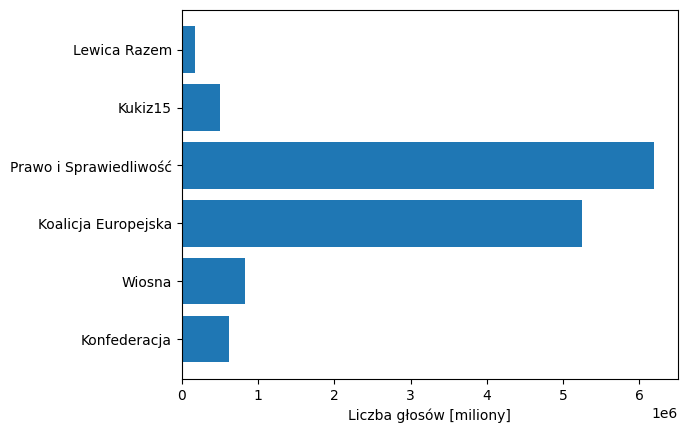

In [4]:
#Prosta wizualizacja ogólnopolskich wyników głównych komitetów
import matplotlib.pyplot as plt

cols = ['Konfederacja', 'Wiosna','Koalicja Europejska', 'Prawo i Sprawiedliwość', 'Kukiz15', 'Lewica Razem']
plt.barh(cols,big_dataset[cols].sum())
plt.xlabel("Liczba głosów [miliony]")

Porównanie z wynikami wyborów z Wikipedii

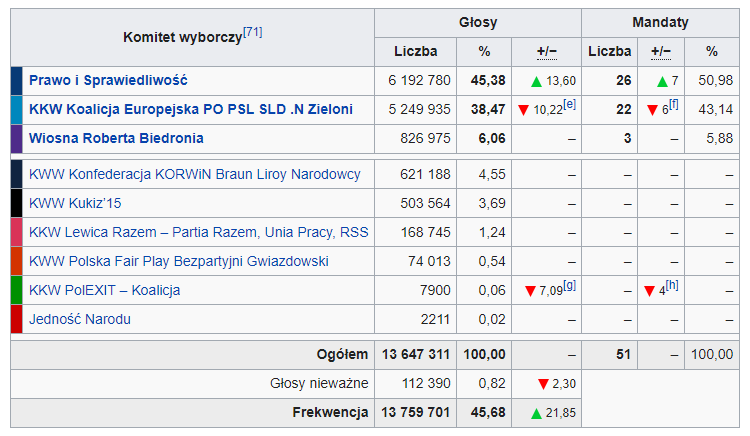

Text(0, 0.5, 'Średnia frekwencja [%]')

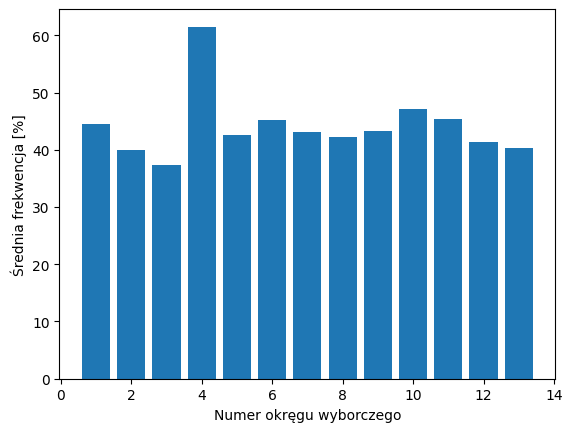

In [5]:
# Prezentacja danych dotyczących frekwencji
big_dataset["frekwencja"] = (big_dataset["Liczba kart wyjętych z urny"]/big_dataset["Liczba wyborców uprawnionych do głosowania"])*100
# print(big_dataset["frekwencja"])
# print(big_dataset.groupby(['obwod'])['frekwencja'].mean('frekwencja'))

frekwencja_po_obwodach = pd.DataFrame(big_dataset.groupby(['obwod'])['frekwencja'].mean('frekwencja'))
# print(frekwencja_po_obwodach['frekwencja'])

plt.bar(big_dataset['obwod'].unique(), frekwencja_po_obwodach['frekwencja'])
plt.xlabel("Numer okręgu wyborczego")
plt.ylabel("Średnia frekwencja [%]")

In [6]:
woj_obwod = big_dataset.groupby(['Województwo','obwod']).size().reset_index().drop(columns=0).sort_values(by=['obwod'])
print(woj_obwod)

            Województwo  obwod
10            pomorskie      1
1    kujawsko-pomorskie      2
11  warmińsko-mazurskie      3
9             podlaskie      3
4           mazowieckie      4
5           mazowieckie      5
14              łódzkie      6
12        wielkopolskie      7
2             lubelskie      8
8          podkarpackie      9
16       świętokrzyskie     10
6           małopolskie     10
15              śląskie     11
7              opolskie     12
0          dolnośląskie     12
13   zachodniopomorskie     13
3              lubuskie     13
